Vizsgáljuk meg a Login-ek min., max., és átlagos hosszát!

In [21]:
SELECT MIN(LEN(LOGIN)) AS Legrövidebb_login, 
       MAX(LEN(LOGIN)) AS Leghosszabb_login, 
       AVG(LEN(LOGIN)) AS Átlagos_login_hossz

FROM Rendeles
WHERE LOGIN IS NOT NULL
AND LEN(LOGIN) > 0

(1 row affected)

Total execution time: 00:00:00.024

Legrövidebb_login,Leghosszabb_login,Átlagos_login_hossz
3,11,6


Vizsgáljuk a megrendelés és a kiszállítás közötti reakcióidőt!

In [22]:
DECLARE 
@min int = 3,
@max int = 7;   

SELECT 
    SUM(CASE WHEN DATEDIFF(day, rend_datum, szall_datum) < @min THEN 1 ELSE 0 end) AS '3 nap alatt',
    SUM(CASE WHEN DATEDIFF(day, rend_datum, szall_datum) BETWEEN @min and @max THEN 1 ELSE 0 end) AS '3 és 7 nap között',
    SUM(CASE WHEN DATEDIFF(day, rend_datum, szall_datum) > @max THEN 1 ELSE 0 end) AS '7 nap felett'
FROM Rendeles

(1 row affected)

Total execution time: 00:00:00.029

3 nap alatt,3 és 7 nap között,7 nap felett
3110,15648,9327


Hány helyen nincs megadva a szállítási cím?

In [23]:
SELECT [kitöltötték-e?], COUNT(*) AS "mennyi"
FROM 
(SELECT CASE WHEN SZALL_CIM IS NULL THEN 'kitöltetlen'
            WHEN LEN(SZALL_CIM) = 0 THEN 'üres'
            ELSE 'kitöltött'
            END AS 'kitöltötték-e?'
FROM Rendeles) rows
GROUP BY [kitöltötték-e?]


(2 rows affected)

Total execution time: 00:00:00.053

kitöltötték-e?,mennyi
kitöltött,6396
kitöltetlen,21689


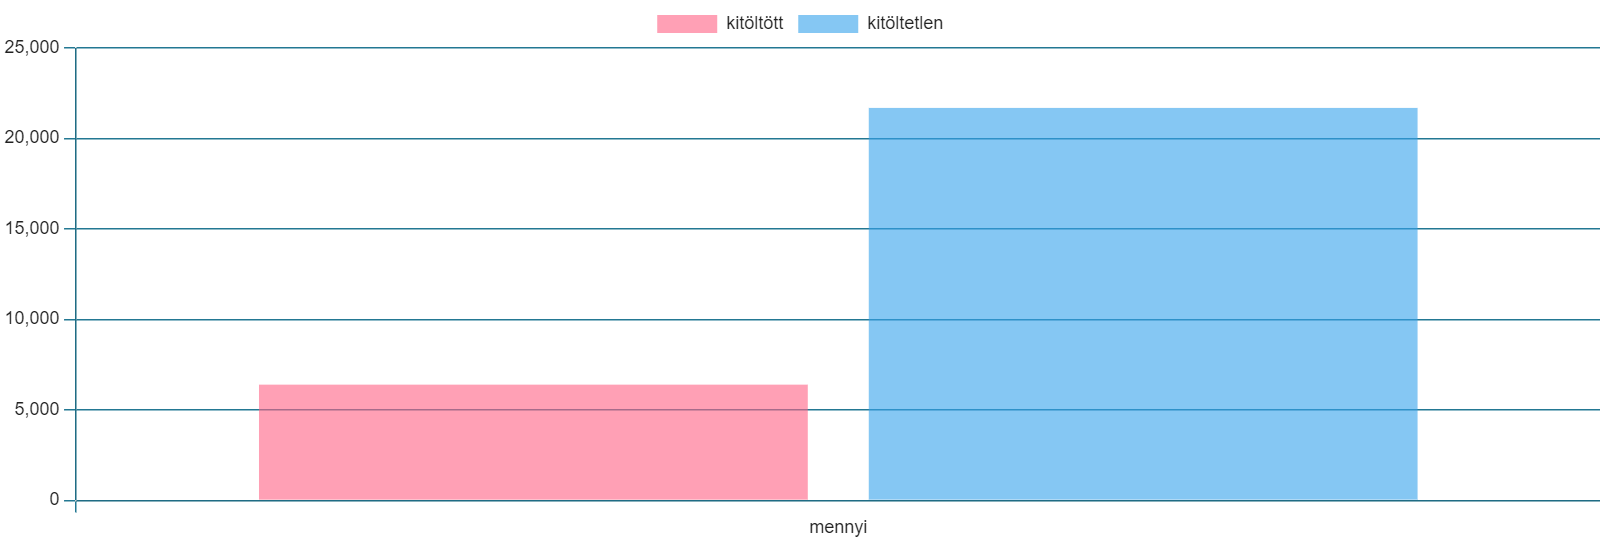

Adjunk vissza 8 dbvéletlenül kiválasztott megrendelőt!

In [24]:
SELECT TOP (8) LOGIN
FROM Rendeles
GROUP BY LOGIn
ORDER BY NEWID()

(8 rows affected)

Total execution time: 00:00:01.366

LOGIN
JOZSEFG
annamaria1
alexandra
istvan
tunde
SEBASTIANF
zsofi1
MARKH


Jelenítsünk meg véletlenszerűen 5 db rendelést!

In [25]:
SELECT * 
FROM Rendeles
WHERE SORSZAM IN (
    SELECT TOP (10) SORSZAM
    FROM Rendeles
    ORDER BY NEWID())

(10 rows affected)

Total execution time: 00:00:00.033

SORSZAM,LOGIN,REND_DATUM,SZALL_DATUM,SZALL_CIM,SZALL_MOD,FIZ_MOD,SZAMLA_CIM
21458,tibor,2016-10-16,2016-10-19,NULL,Személyes átvétel,Átutalás,NULL
23139,eva2,2016-11-27,2016-12-05,"Répcelak, Fő u. 2.",Posta,Bankkártya,"9653 Répcelak, Fő u. 2."
9320,LASZLOA,2015-12-21,2015-12-31,NULL,Posta,Bankkártya,NULL
22316,RENATAK,2016-11-06,2016-11-08,NULL,Posta,Bankkártya,NULL
15211,MONIKAM,2016-05-13,2016-05-23,NULL,GLS,Átutalás,NULL
26818,emese,2017-03-01,2017-03-08,NULL,Személyes átvétel,Bankkártya,NULL
14006,ANDRASE,2016-04-14,2016-04-19,NULL,Személyes átvétel,Készpénz,NULL
14738,eva2,2016-05-01,2016-05-04,NULL,GLS,Átutalás,NULL
357,istvan,2015-05-10,2015-05-15,"Dabas, Nagy u.14.",Személyes átvétel,Átutalás,"2370 Dabas, Nagy u.14."
9634,julia,2015-12-29,2016-01-01,NULL,Posta,Átutalás,NULL


Nézzük meg, hogy a rendelés és a szállítás között eltelt idő minmumát, maximumát, átlagos idejét, szórását, és szórásnégyzetek átlagát!

In [38]:
SELECT MIN(DATEDIFF(day, rend_datum, szall_datum)) AS 'Minimum', 
       MAX(DATEDIFF(day, rend_datum, szall_datum)) AS 'Maximum', 
       AVG(DATEDIFF(day, rend_datum, szall_datum)) AS 'Átlag', 
       STDEV(DATEDIFF(day, rend_datum, szall_datum)) AS 'Szórás', 
       VAR(DATEDIFF(day, rend_datum, szall_datum)) AS 'Szórásnégyzet'
FROM Rendeles
WHERE rend_datum IS NOT NULL AND SZALL_DATUM IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.079

Minimum,Maximum,Átlag,Szórás,Szórásnégyzet
2,10,5,"2,595976306864163","6,739092985800097"


Nézzük meg az első napot és az utolsót ahol rendelést adtak le!

In [39]:
SELECT MIN(REND_DATUM) as 'Legelső rendelés',
        MAX(REND_DATUM) as 'Legkésőbbi rendelés'
FROM Rendeles

(1 row affected)

Total execution time: 00:00:00.023

Legelső rendelés,Legkésőbbi rendelés
2015-05-01,2017-04-01


Nézzük meg havi bontásban a leadott rendelések számát!

In [41]:
SELECT LEFT(REND_DATUM, 7) AS 'Rendeles honapja',
    COUNT(SORSZAM) AS 'Eladott darabszam'
    
FROM Rendeles
GROUP BY LEFT(REND_DATUM, 7)
ORDER BY LEFT(REND_DATUM, 7)

(24 rows affected)

Total execution time: 00:00:00.065

Rendeles honapja,Eladott darabszam
2015-05,1203
2015-06,1155
2015-07,1235
2015-08,1276
2015-09,1207
2015-10,1233
2015-11,1178
2015-12,1260
2016-01,1226
2016-02,1193


Nézzük meg, milyen arányban vannak a kis/közepes/nagy megrendelőink!

In [26]:
SELECT COUNT(megrendelo) AS 'megrendelo', [megrendelo tipus]
FROM (SELECT LOGIN AS 'megrendelo', COUNT(SORSZAM) AS 'darab',
        CASE WHEN COUNT(SORSZAM) < 100 THEN 'kis megrendelő'
        WHEN COUNT(SORSZAM) < 500 THEN 'közepes megrendelő'
        ELSE 'nagy megrendelő'
        END AS 'megrendelo tipus'
        FROM Rendeles
        GROUP BY LOGIN) ROWS

GROUP BY [megrendelo tipus]        




(3 rows affected)

Total execution time: 00:00:00.051

megrendelo,megrendelo tipus
130,kis megrendelő
60,közepes megrendelő
1,nagy megrendelő


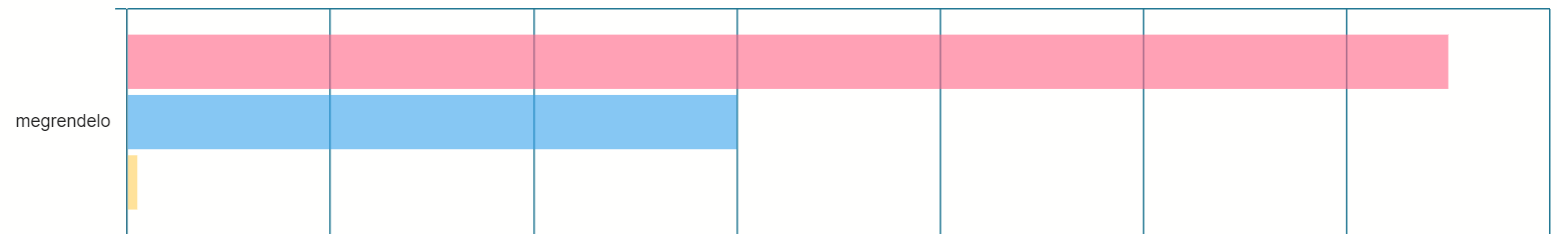

Itt azt vizsáljuk meg, hogy amennyiben kitöltötték a szállítási címet, hova kellett kiszállítani. Tehát a megrendeléseink milyen arányban megyeszékhelyről, és mennyien kisebb településekről érkezik be.

In [27]:
SELECT  [település típus], COUNT(SORSZAM) AS 'darabszám'
FROM(
SELECT  (IIF(LEFT( SZALL_CIM, CHARINDEX(',', SZALL_CIM)-1 ) 
            IN ('Győr', 'Szombathely', 'Zalaegerszeg', 'Tatabánya', 'Veszprém', 'Kaposvár', 'Pécs', 'Szekszárd', 'Budapest', 'Salgótarján', 'Eger', 'Miskolc', 'Nyíregyháza', 'Debrecen', 'Szolnok', 'Kecskemét', 'Szeged', 'Békéscsaba'),
             'megyeszékhely', 'település')) AS 'település típus', SORSZAM  FROM Rendeles WHERE SZALL_CIM IS NOT NULL)  rows
GROUP BY [település típus]

(2 rows affected)

Total execution time: 00:00:00.109

település típus,darabszám
település,5075
megyeszékhely,1321


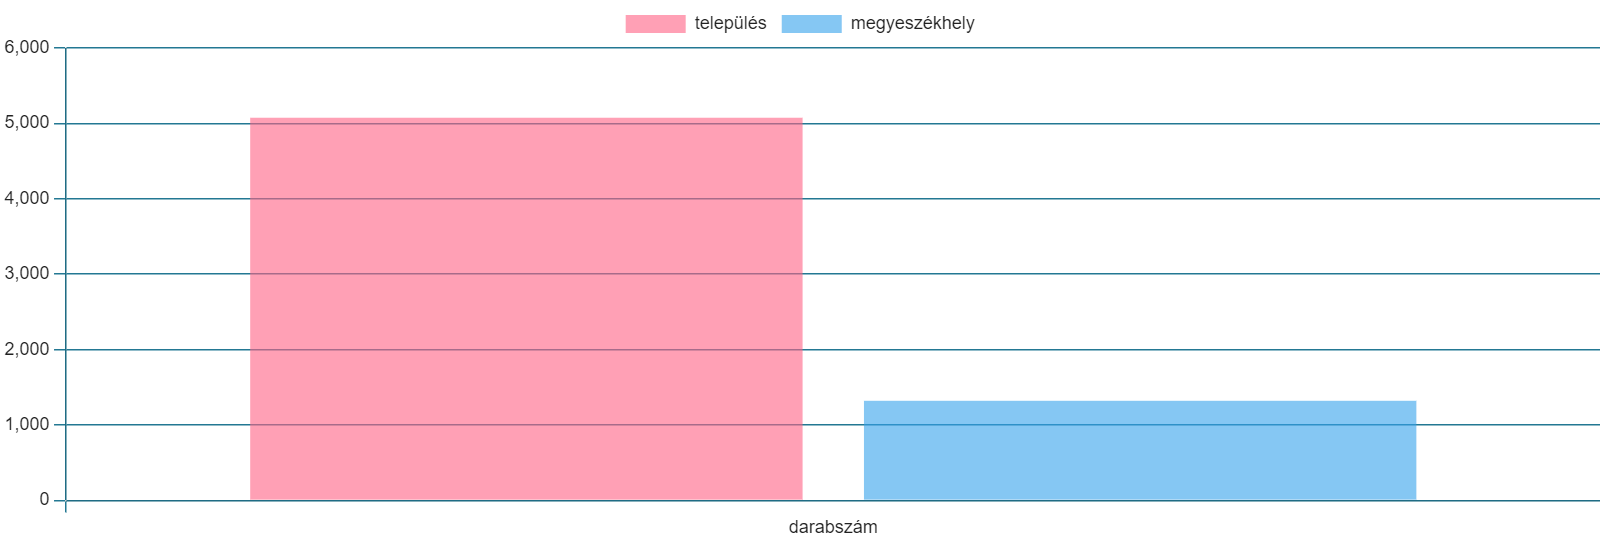

Most nézzük meg, hogy kik a legtöbb rendelést leadó vevőink! (látszik, hogy van egy vásárló aki kiemelkedik)

In [28]:

SELECT TOP 10 LOGIN, COUNT(SORSZAM)  AS 'darab'
FRom Rendeles
GROUP BY [LOGIN], SZALL_CIM
ORDER BY COUNT(SORSZAM) DESC;


(10 rows affected)

Total execution time: 00:00:00.112

LOGIN,darab
peter4,678
szabolcs,367
balint1,363
eva2,356
TAMASF,353
david,346
BEATRIXK,345
ferenc1,345
LASZLOA,343
szilvia1,343


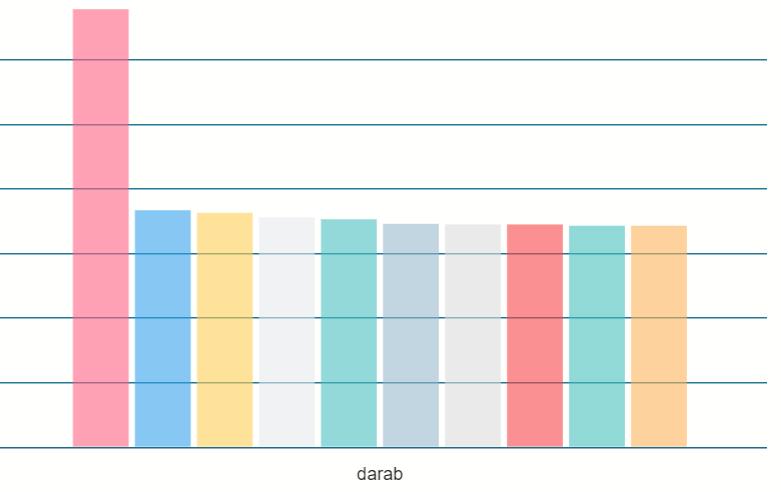

Nézzük meg az egyes fizetési módszerek mennyire népszerűek!

In [29]:
SELECT FIZ_MOD, COUNT(SORSZAM) 'darab'
FROM Rendeles
GROUP BY FIZ_MOD

(3 rows affected)

Total execution time: 00:00:00.101

FIZ_MOD,darab
Bankkártya,14003
Átutalás,11284
Készpénz,2798


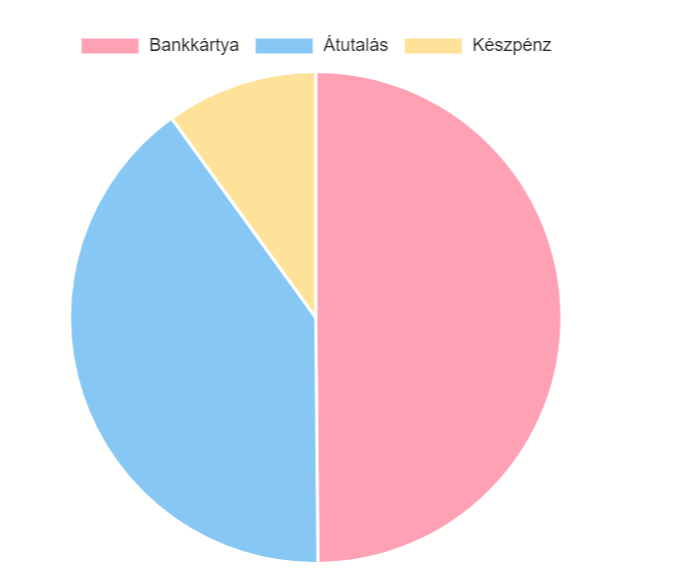

Nézzük meg a szállítási módbeli és a fizetési módbeli bontásban a beérkezett rendeléseket!

In [30]:
SELECT FIZ_MOD, SZALL_MOD, COUNT(SORSZAM) AS 'darab'
FROM Rendeles
GROUP BY GROUPING SETS (FIZ_MOD), (SZALL_MOD)
ORDER BY FIZ_MOD, COUNT(SORSZAM)

(9 rows affected)

Total execution time: 00:00:00.048

FIZ_MOD,SZALL_MOD,darab
Átutalás,Posta,3709
Átutalás,GLS,3777
Átutalás,Személyes átvétel,3798
Bankkártya,Posta,4607
Bankkártya,Személyes átvétel,4695
Bankkártya,GLS,4701
Készpénz,Posta,875
Készpénz,GLS,948
Készpénz,Személyes átvétel,975


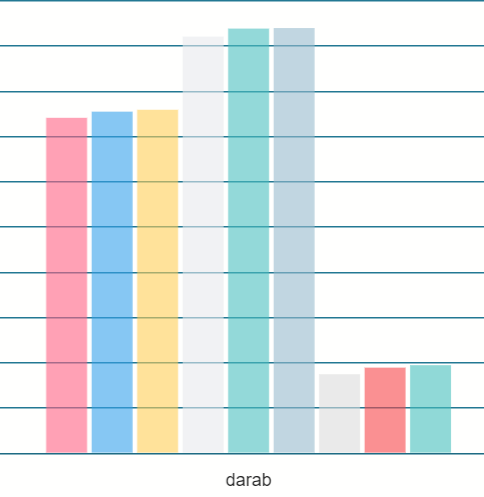

Nézzük meg hány darab rendelést dolgoztak fel gyorsan (\<5), átlagosan(5), és lassan (\>5)!

In [33]:
SELECT IDO, COUNT(ID) AS 'darab'
FROM (SELECT CASE WHEN DATEDIFF(day, rend_datum, szall_datum) < 5 THEN 'gyors'
                    WHEN  DATEDIFF(day, rend_datum, szall_datum) = 5 THEN 'átlagos'
                    ELSE 'lassú'
                    END AS 'IDO', SORSZAM AS 'ID'
                    FROM Rendeles) ROWS
GROUP BY IDO


(3 rows affected)

Total execution time: 00:00:00.058

IDO,darab
gyors,9438
lassú,15512
átlagos,3135


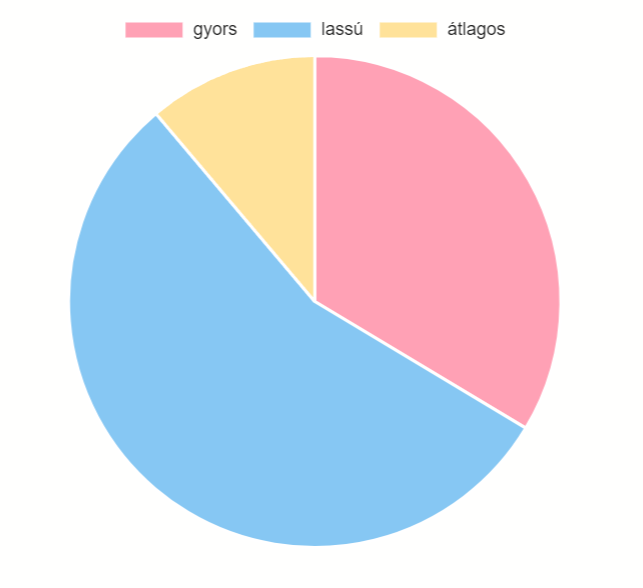

Nézzük meg hány féle számlázási cím van! (azt is hány helyen nincs kitöltve)

In [34]:
SELECT ISNULL(SZAMLA_CIM, 'N/A') AS 'Számlázási címek', COUNT(SORSZAM) 'ide számolt rendelések'
FROM Rendeles

GROUP BY ISNULL(SZAMLA_CIM, 'N/A')
ORDER BY COUNT(SORSZAM) DESC

(274 rows affected)

Total execution time: 00:00:02.116

Számlázási címek,ide számolt rendelések
N/A,25535
"9023 Győr, Fő u. 2.",61
"5137 Jászkisér, Fő u. 2.",54
"9023 Győr, Kiss u. 32.",41
"5137 Jászkisér, Kiss u. 32.",40
"5200 Törökszentmiklós, Fő u. 2.",39
"5071 Besenyszög, Fő u. 2.",29
"6786 Ruzsa, Fő u. 2.",28
"2484 Agárd, Fő u. 2.",28
"6646 Tömörkény, Fő u. 2.",27
